# Decision Trees

#EN
In this challenge, we will use decision trees in both a classification and regression task. We visualize each of these representations. We will use the `mpg` dataset. It's a car dataset.

# FR
Dans ce défi, nous allons utiliser des arbres de décision à la fois dans une tâche de classification et de régression. Nous visualiserons chacune de ces représentations. Nous utiliserons le jeu de données `mpg`. C'est un jeu de données sur les voitures.

# MISSION 1 : Regression Trees

# Exercice 1
# EN
- Drop the rows with missing values
- Drop the "name" column
- Transform the "origin" column (encode it) to represent the following:
  - USA = 0, Japan = 1, Europe = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Supprimez la colonne "nom"
- Transformez la colonne "origine" (encodez-la) pour représenter ce qui suit :
  - États-Unis = 0, Japon = 1, Europe = 2

In [1]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")


In [2]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
# EXERCICE 1
# INSERT CODE HERE


"""
suppression de la colonne 'name'
suppression des valeurs manquantes
encodage de la colonne origin

"""

data.drop(columns = ['name'], inplace = True)
data.dropna(inplace = True)

origin = {'usa': 0, 'japan':1, 'europe' : 2}

data['origin_encoded'] = data['origin'].replace(origin)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,origin_encoded
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0


In [4]:
""" apres encodage on supprime la colonne origin """

data.drop(columns = ['origin'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             392 non-null    float64
 1   cylinders       392 non-null    int64  
 2   displacement    392 non-null    float64
 3   horsepower      392 non-null    float64
 4   weight          392 non-null    int64  
 5   acceleration    392 non-null    float64
 6   model_year      392 non-null    int64  
 7   origin_encoded  392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


# Exercice 2
# EN
- Prepare your X and y (mpg column) as a target.
- Split into train and test splits using random state of 42 and a test size of 20%.

# FR
- Préparez votre X et y (colonne mpg) comme cible.
- Diviser le dataset en 2 parties (entraînement et test) en utilisant un état aléatoire de 42 et une taille de test de 20 %.

In [5]:
# Exercice 2
# INSERT CODE HERE
from sklearn.tree import DecisionTreeRegressor

X = data[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin_encoded']]
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Exercice 3

# EN
-  Fit a decision tree (Regression)

# FR
- Entraîne l'arbre de decision (Regression)

In [6]:
# Exercice 3
# INSERT CODE HERE
modelDTR = DecisionTreeRegressor(max_depth = 3)
modelDTR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

# Exercice 4

# EN
- Predict on the xtest set

# FR
- Réalise une prédiction sur le X_test.

In [7]:
# Exercice 4
# INSERT CODE HERE
prediction_1 = modelDTR.predict(X_test)
prediction_1

array([28.28333333, 22.83469388, 33.91408451, 28.28333333, 27.98461538,
       28.28333333, 13.80508475, 33.91408451, 19.04827586, 28.28333333,
       13.80508475, 22.83469388, 17.17894737, 28.28333333, 22.83469388,
       27.98461538, 22.83469388, 33.91408451, 33.91408451, 27.98461538,
       22.83469388, 33.91408451, 33.91408451, 13.80508475, 28.28333333,
       22.83469388, 22.83469388, 19.04827586, 28.28333333, 28.28333333,
       13.80508475, 19.04827586, 19.04827586, 33.91408451, 13.80508475,
       33.91408451, 13.80508475, 28.28333333, 13.80508475, 13.80508475,
       13.80508475, 28.28333333, 33.91408451, 28.28333333, 13.80508475,
       13.80508475, 19.04827586, 33.91408451, 28.28333333, 28.28333333,
       13.80508475, 22.83469388, 22.83469388, 27.98461538, 38.        ,
       19.04827586, 19.04827586, 19.04827586, 22.83469388, 22.83469388,
       13.80508475, 19.04827586, 27.98461538, 22.83469388, 22.83469388,
       28.28333333, 22.83469388, 28.28333333, 19.04827586, 13.80

# Exercice 5

# EN
- Print out the R2 score (train and test data).

# FR
- Affiche le score R2 (Entraînement et test).

In [8]:
# Exercice 5
# INSERT CODE HERE
R2_train = modelDTR.score(X_train, y_train)
R2_test = modelDTR.score(X_test, y_test)
print('R2 test is :', R2_train)
print('R2 score is :', R2_test)

R2 test is : 0.8401133075852176
R2 score is : 0.732554904599257


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.



In [9]:
# Exercice 6
# INSERT CODE HERE
"""
modelDTR.feature_importances_ donne le poids de chaque variable dans la model
il revoit un numpy array comme poids de chque variable
le numpy array obtenu est transformé en dataframe avec les colonnes en index et le %poids de chaque varaible en abscisse.

"""
feature = modelDTR.feature_importances_

df_feature = pd.DataFrame(feature, index = ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin_encoded'], columns = ['%feature'])
df_feature['%feature'] = df_feature['%feature']*100
df_feature

,%feature
cylinders,0.000000
displacement,70.519814
horsepower,19.621309
weight,0.000000
acceleration,0.000000
model_year,9.858877
origin_encoded,0.000000


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

In [10]:
# EXERCICE 7
# INSERT CODE HERE
from sklearn.tree import plot_tree

plt.figure(figsize = (10,6))

plot_tree(modelDTR,
          filled = True,
         class_names = modelDTR.feature_importances_,
          feature_names=X_train.columns)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin_encoded'],
      dtype='object') instead.

<Figure size 1000x600 with 0 Axes>

# MISSION 2 : Classification Trees

# EXERCICE 1

# EN
- Drop rows with missing values
- Turn the species column into numeric (encode it) :
  - Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
- Turn the island column into numeric (encode it) :
  - Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Transformez la colonne des espèces en numérique (encodez-la) :
  - Plus précisément, Adelie = 0, Chinstrap = 1 et Gentoo = 2
- Transformez la colonne 'island' en numérique (encodez-la) :
  - Plus précisément, Torgersen = 0, Biscoe = 1, Dream = 2

In [ ]:
# Load in the Penguins dataset
data2 = sns.load_dataset('penguins')
data2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
data2.dropna(inplace = True)
data2.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
# Exercice 1
# INSERT CODE HERE

"""
encodage des variables 'especes' et 'island' avec un dictionnaire et non pas avec 'factorise' ou 'get_dummies'.

"""
species = {'Adelie' : 0,
           'Chinstrap' : 1,
           'Gentoo' : 2
           }

island = {'Torgersen' : 0,
          'Biscoe' : 1,
          'Dream' : 2
          }
data2['species'] = data2['species'].replace(species)
data2['island'] = data2['island'].replace(island)

data2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,Male
1,0,0,39.5,17.4,186.0,3800.0,Female
2,0,0,40.3,18.0,195.0,3250.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
5,0,0,39.3,20.6,190.0,3650.0,Male


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 20.8+ KB


# EXERCICE 2

# EN
- Save as variable your X and your y (column "sex")
- Using a random state of 42 and a test size of 0.20, split in training and testing sets.

# FR
- Enregistrez comme variable votre X et votre y (colonne "sex")
- Utilisation d'un état aléatoire de 42 et d'une taille de test de 0.20, divisé en ensembles d'apprentissage et de test.

In [ ]:
# Exercice 2
# INSERT CODE HERE
from sklearn.tree import DecisionTreeClassifier


X = data2[['species','island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
y = data2['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# EXERCICE 3
# EN

-  Fit a decision tree (Classification)

# FR
- Entraîne l'arbre de decision (Classification)

In [ ]:
# Exercice 3
# INSERT CODE HERE
modelDTC = DecisionTreeClassifier(max_depth = 2)
modelDTC.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

# Exercice 4

# EN
- Predict on the X_test set

# FR
- Réalise une prédiction sur le X_test.

In [ ]:
# Exercice 4
# INSERT CODE HERE
prediction = modelDTC.predict(X_test)
prediction

array(['Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Female'], dtype=object)

# Exercice 5

# EN
- Print the accuracy score for the predictions (Train et test)

# FR
- Affiche le score de prédiction (Train & test)

In [ ]:
# Exercice 5
# INSERT CODE HERE
score = modelDTC.score(X,y)
score

0.8798798798798799

# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.

In [ ]:
# Exercice 6
# INSERT CODE HERE
poids = modelDTC.classes_
poids

array(['Female', 'Male'], dtype=object)

# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

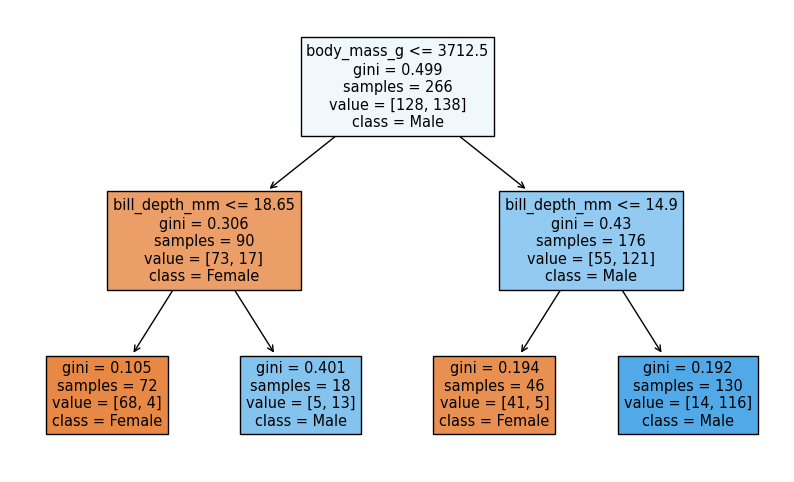

In [ ]:
# Exercice 7
# INSERT CODE HERE
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plot_tree(modelDTC, filled = True,
          class_names = modelDTC.classes_,
          feature_names=X_train.columns )
plt.show()

# EN

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!***

Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).

# Machine Learning Optimization
Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.


# FR
# Effets de la modification de la profondeur maximale
Dans cette section, nous allons voir comment la modification de max_depth joue un rôle dans la précision de la prédiction. C'est l'un des hyperparamètres les plus importants pour les arbres de décision.

*** Cet exercice n'est fait que pour vous permettre de voir l'impact du choix de la profondeur max_correcte ! ***

Le choix de la profondeur max_correcte (ou de tout autre hyperparamètre d'ailleurs) se fait généralement à l'aide d'une validation croisée ou d'une technique plus avancée (Recherche par grille, recherche aléatoire, optimisation bayésienne).

# Optimisation d'algorithmes :
À l'aide de l'ensemble de données ci-dessus, ajustez et prédisez les ensembles d'entraînement et de test à l'aide d'un max_depth de 1 à 10.

***Vous allez faire varier la valeur max_depth du decision tree et l'entraîner pour obtenir le score (train et test) sur chaque changement de max_depth. Ce sera une boucle d'entraînement. ***

Par exemple, dans la première itération, vous ajusterez les ensembles de données xtrain et ytrain à l'aide de max_depth = 1, prédisez le xtest à l'aide de ce modèle, et puis enregistrez la précision. À la prochaine itération, le max_depth serait alors de 2, etc.

# Exercice 8

# EN
- Using a random state of 42, fit multiple decision trees with various max depths.
- Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

# FR
- En utilisant un état aléatoire de 42, ajustez plusieurs arbres de décision avec différentes profondeurs maximales (max_depth).
- Enregistrez ces précisions dans une liste (c'est-à-dire list_of_accuracies.append(accuracy))

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies_train = []
list_of_accuracies_test = []

for i in range(1, 11):
  modelDTC = DecisionTreeClassifier(max_depth = i)
  modelDTC.fit(X_train, y_train)

  # Prédiction et calcul de la précision pour l'ensemble d'entraînement avec max_depth=i
  y_pred_train = modelDTC.predict(X_train)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  list_of_accuracies_train.append(accuracy_train)

    # Prédiction et calcul de la précision pour l'ensemble de test avec max_depth=i
  y_pred_test = modelDTC.predict(X_test)
  accuracy_test = accuracy_score(y_test, y_pred_test)
  list_of_accuracies_test.append(accuracy_test)

list_of_accuracies_train
list_of_accuracies_test
max_depth = range(1,11)

Text(0, 0.5, 'accuracies')

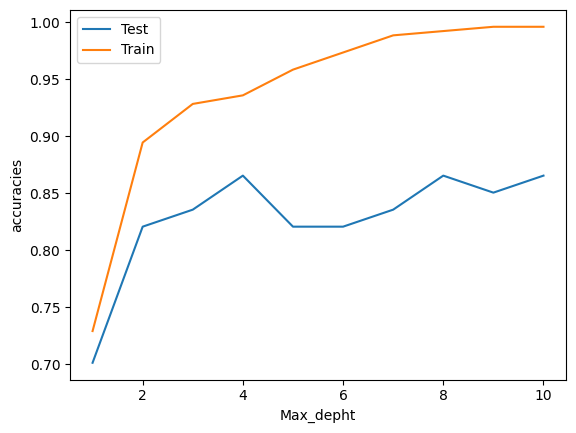

In [ ]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE
plt.plot(max_depth, list_of_accuracies_test, label = 'Test')
plt.plot(max_depth, list_of_accuracies_train, label = 'Train')
plt.legend()
plt.xlabel('Max_depht')
plt.ylabel('accuracies')